### Load Packages:

In [1]:
# Numpy will be used for Linear Algebra
import numpy as np

# Pandas will be used for DataFrames
import pandas as pd
# Display all Columns 
pd.set_option('display.max_columns', None)

# Matplotlib for Visualization
import matplotlib.pyplot as plt
# Display plots in notebook
%matplotlib inline

# Seaborn for easier Visualization
import seaborn as sns
# Change color scheme
sns.set_style("whitegrid")

# Sys for size of Dataset
import sys

## 1. Load the Data

In [2]:
# Load training set into a pandas DataFrame
train = pd.read_csv('../Datasets/Ames_Training_Set.csv')

# Load the testing set into a pandata DataFrame
test = pd.read_csv("../Datasets/Ames_Testing_Set.csv")

## 2. Name the Target Variable

In [3]:
# Name the target variable
target = train['SalePrice']

# Create the log transformation of SalePrice
target_log = np.log1p(train['SalePrice'])

## 3. Concatenate train and test dataset

In [4]:
# Check the size of both training and testing set
print("Train Shape:",train.shape)
print("Testing Shape:",test.shape)

Train Shape: (2051, 82)
Testing Shape: (879, 80)


In [5]:
# Concatenate datasets and input in a pandas DataFrame
df = pd.concat([train,test],ignore_index=True)

In [6]:
# For df: Leave no space between feature names that contain two words
df.columns = [x.replace(' ','') for x in df.columns]

# For train: Leave no space between feature names that contain two words
train.columns = [x.replace(' ','') for x in train.columns]

# For test: Leave no space between feature names that contain two words
test.columns = [x.replace(' ','') for x in test.columns]

## 4. Missing Values

In [7]:
# Check total nulls of df in descending order
df.isnull().sum().sort_values(ascending = False)[:29]

PoolQC           2917
MiscFeature      2824
Alley            2732
Fence            2358
FireplaceQu      1422
SalePrice         879
SaleCondition     879
LotFrontage       490
GarageYrBlt       159
GarageFinish      159
GarageCond        159
GarageQual        159
GarageType        157
BsmtExposure       83
BsmtFinType2       81
BsmtCond           80
BsmtQual           80
BsmtFinType1       80
MasVnrArea         23
MasVnrType         23
BsmtFullBath        2
BsmtHalfBath        2
GarageArea          1
GarageCars          1
BsmtFinSF2          1
BsmtFinSF1          1
Electrical          1
TotalBsmtSF         1
BsmtUnfSF           1
dtype: int64

In [8]:
def percent_missing_data(data):
    """This function prints out the percentage of nulls with overall data"""
    print("Percentage of missing data:")
    for col in data.columns:
        missing = len(data) - data[col].count()
        if (missing > 0 or missing == "NAN"):
            print(col,":",missing,"values missing which is",str(round(float(missing/float(len(data)))*100,3)),"% of total dataframe.")

In [9]:
percent_missing_data(df)

Percentage of missing data:
Alley : 2732 values missing which is 93.242 % of total dataframe.
BsmtCond : 80 values missing which is 2.73 % of total dataframe.
BsmtExposure : 83 values missing which is 2.833 % of total dataframe.
BsmtFullBath : 2 values missing which is 0.068 % of total dataframe.
BsmtHalfBath : 2 values missing which is 0.068 % of total dataframe.
BsmtQual : 80 values missing which is 2.73 % of total dataframe.
BsmtUnfSF : 1 values missing which is 0.034 % of total dataframe.
BsmtFinSF1 : 1 values missing which is 0.034 % of total dataframe.
BsmtFinSF2 : 1 values missing which is 0.034 % of total dataframe.
BsmtFinType1 : 80 values missing which is 2.73 % of total dataframe.
BsmtFinType2 : 81 values missing which is 2.765 % of total dataframe.
Electrical : 1 values missing which is 0.034 % of total dataframe.
Fence : 2358 values missing which is 80.478 % of total dataframe.
FireplaceQu : 1422 values missing which is 48.532 % of total dataframe.
GarageArea : 1 values mi

## 5. Filterings

#### Note: In this section I will filter out columns that have a common word. There will be no particular order into cleaning these columns but I will still add a heading as to what is being done for each column(s).

#### Functions that will be used later on:

In [10]:
def column_filter(string):
    """This function filters out a dataframe with columns of selected string
        string: Enter in this format 'selected_string'"""
    return df[df.columns[(df.columns.to_series().str.contains(string))]]

In [11]:
def column_inspection(string):
    """This function prints out what is needed to inspect the given column of selected filtered string
        string: Enter in this format 'selected_string'"""
    print("Display part of DataFrame:\n")
    print(column_filter(string).head(2))
    print("==============================================================")
    print("Description:\n")
    print(column_filter(string).describe())
    print("==============================================================")
    print("Data Types:\n")
    print(column_filter(string).dtypes)
    print("==============================================================")
    print("Number of Null Values:\n")
    print(column_filter(string).isnull().sum())
    print("==============================================================")

In [12]:
def column_correlation(string):
    """This function shows a heatmap of selected filtered columns
        string: Enter in this format 'selected_string'"""
    f,ax = plt.subplots(figsize =(12,12))  # Make figure size 12 x 12  
    correlation_matrix = column_filter(string).corr() * 100  # Compute Correlation Matrix 
    cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate custom diverging colormap
    mask = np.zeros_like(correlation_matrix,dtype=np.bool) # Generate a mask for upper triangle
    mask[np.triu_indices_from(mask)] = True # Continue mask for upper triangle
    img = sns.heatmap(correlation_matrix,vmax = .8,center=0, square = True,cmap = cmap,
                annot = True,fmt='.0f',mask=mask, linewidths=.8,cbar_kws={"shrink":.5})  # Create the Heatmap
    plt.suptitle(string, x=0.5, y=.98,ha='center', fontsize=30); # Title of Heatmap
    fig = img.get_figure() # Grab each figure
    fig.savefig("../Images/Heat_Plots/%s.jpg"%str(string)) # Save each figure 
    plt.show()

In [13]:
def drop_redundants(data,redundants):
    """This function takes in a list of column names and drops them given a specific dataframe
        data: Name of DataFrame
        redundants: Enter in this format ['col_name1','col_name2','col_name3']"""
    return data.drop(redundants,axis = 1,inplace = True)

In [14]:
def drop_rows(data,string):
    """This function will drop null rows of specific subset
        data: Name of DataFrame
        string: Enter in this format 'selected_string'"""
    return data.dropna(axis = 0, subset = [string])

In [15]:
def shape_of_dataframe(data):
    """This function will print the shape of current DataFrame
        data: Name of DataFrame"""
    print("New shape of DataFrame:",data.shape)

In [16]:
def loc_missing(data,string):
    """This function locates the nulls of specific column
        data: Name of DataFrame
        string: Enter in this format 'selected_string'"""
    return data.loc[data[string].isnull()]

In [17]:
def percent_missing(data,string):
    """This function prints out the percentage of nulls with overall data given a specific column name/frame
        data: Name of DataFrame
        string: Enter in this format 'selected_string'"""
    return round(data[string].isnull().sum() / data.shape[0] * 100, 3)

In [18]:
def fill_nulls(data,string):
    """This function will fill nulls with Na
        data: Name of DataFrame
        string: Enter in this format 'selected_string'"""
    return data[string].fillna("Na",inplace = True)

In [19]:
def view_unique_cat(string):
    """This functions prints out the unique values for the given string
        string: Enter in this format 'selected_string'"""
    print(df[string].unique())

In [20]:
def map_dictionary(data,string,dictionary):
    """This function maps the given dictionary for the given string in specific DF
        data: Name of DataFrame
        string: Enter in this format 'selected_string'
        dictionary: Name of dictionary"""
    data[string] = data[string].map(dictionary)
    return data.head(1)

In [21]:
def box_plots(data,string):
    """This function will give a boxplot for the given DataFrame and string
        data: Name of DataFrame
        string: Enter in this format 'selected_string'"""
    plt.figure(figsize=(12, 8))  # Figure size
    sns.boxplot(data[string],palette='pastel'); # Type of plot
    plt.xlabel(string, fontsize=18) # X-label
    plt.savefig("../Images/Box_Plots/%s.jpg"%str(string)) # Save each figure 

#### Dictionaries that will be used later on:

In [22]:
# Create a condition dictionary to apply to conditions and qualities
condition_dict = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'Na': 0
}

In [23]:
# Create a condition dictionary to apply to Finished or unfinished garage
finished_dict = {
    'Fin': 1,
    'Unf': 0,
    'Na': 0,
    'RFn': 0
}

In [24]:
# Create an exposure dictionary with 4 representing good and 1 No exposure, 0 to No basement
exposure_dict = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'Na': 0
}

In [25]:
# Create a  dictionary to apply ratings containing FinType
fintype_dict = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'Na': 0
}

In [26]:
# Create a  dictionary to apply to Garage Type
garage_type_dict = {
    'Attchd' :6,
    'Detchd' :5,
    'BuiltIn' :4,
    'Basment' :3,
    '2Types' :2,
    'CarPort' :1,
    'Na':0
}

### A. Bath

####     I. Inspect 

In [27]:
# Print Bath info
column_inspection("Bath")

Display part of DataFrame:

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath
0           0.0           0.0         2         1
1           1.0           0.0         2         1
Description:

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath
count   2928.000000   2928.000000  2930.000000  2930.000000
mean       0.431352      0.061134     1.566553     0.379522
std        0.524820      0.245254     0.552941     0.502629
min        0.000000      0.000000     0.000000     0.000000
25%        0.000000      0.000000     1.000000     0.000000
50%        0.000000      0.000000     2.000000     0.000000
75%        1.000000      0.000000     2.000000     1.000000
max        3.000000      2.000000     4.000000     2.000000
Data Types:

BsmtFullBath    float64
BsmtHalfBath    float64
FullBath          int64
HalfBath          int64
dtype: object
Number of Null Values:

BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
dtype: int64


#### II. Correlation

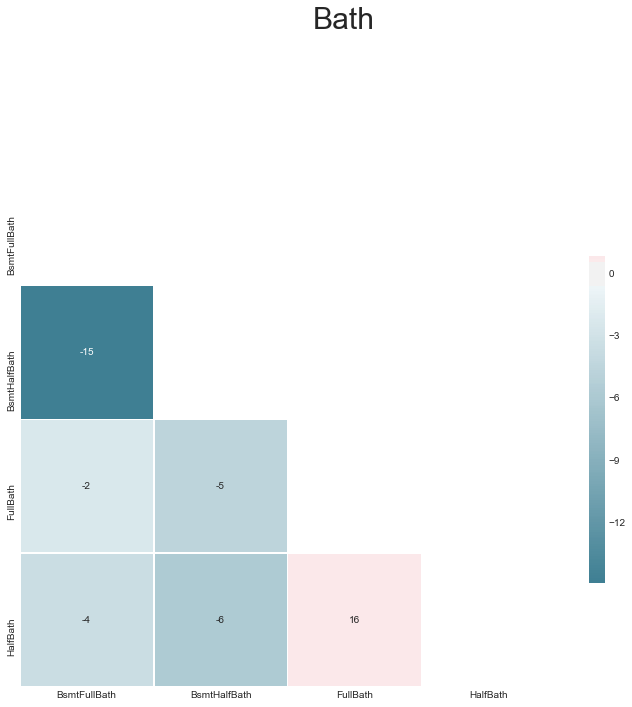

In [28]:
# Heatmap of Bathroom Features
column_correlation("Bath")

#### III. Feature Engineering

In [29]:
# Create a for loop to create a new column for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _["Bath"] = _["BsmtFullBath"] + 0.5*_["BsmtHalfBath"] +\
             _["FullBath"] + 0.5*_["HalfBath"] # New Column

#### IV. Drop Redundant Columns

In [30]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2930, 83)


In [31]:
# Create a for loop to drop redundant columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"])

In [32]:
# Print the shape of the DataFrame
shape_of_dataframe(df)

New shape of DataFrame: (2930, 79)


#### V. Handle Missing Values

In [33]:
# Locate Nulls For Bath
loc_missing(df,"Bath")

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtQual,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PID,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold,Bath
616,3820,0,0,NaN,5,1Fam,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,GasA,TA,1Story,1498,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,NaN,0,7,Edwards,372,7,5,908154080,Y,0,NaN,CompShg,Gable,Normal,WD,284700.0,0,Pave,11,0.0,AllPub,0,1959,1996,2008,NaN
1327,896,0,0,NaN,2,1Fam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,GasA,TA,1Story,1342,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NaN,0,4,BrkSide,0,7,4,903230120,Y,0,NaN,CompShg,Gable,Abnorml,ConLD,79000.0,0,Pave,4,NaN,AllPub,0,1946,1950,2008,NaN


In [34]:
# Print percentage of missing nulls in Bath
percent_missing(df,"Bath")

0.068

In [35]:
# For df: Since nulls are a small percentage of overall data then I will drop these values
df = drop_rows(df,"Bath")

# For train: Since nulls are a small percentage of overall data then I will drop these values
train = drop_rows(train,"Bath")

# For test: Since nulls are a small percentage of overall data then I will drop these values
test = drop_rows(test,"Bath")

In [36]:
# Print new shape of Data Frame
shape_of_dataframe(df)

New shape of DataFrame: (2928, 79)


#### VI. Check Outliers

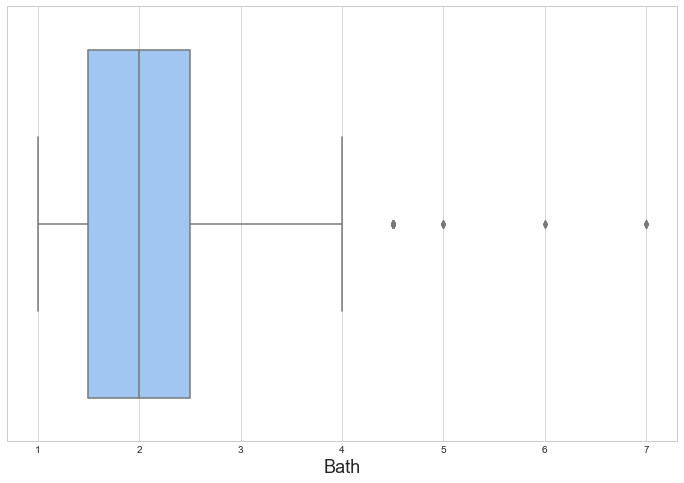

In [37]:
# Check for Outliers
box_plots(df,"Bath")

In [38]:
# Print new shape of Data Frame
shape_of_dataframe(df)

New shape of DataFrame: (2928, 79)


In [39]:
# For df: Since it is a small percentage I will drop Bath == 5,6,7
df = df.loc[(df["Bath"] != 5) & (df["Bath"] != 6) & (df["Bath"] != 7),:]

# For train: Since it is a small percentage I will drop Bath == 5,6,7
train = train.loc[(train["Bath"] != 5) & (train["Bath"] != 6) & (train["Bath"] != 7),:]

# For test: Since it is a small percentage I will drop Bath == 5,6,7
test = test.loc[(test["Bath"] != 5) & (test["Bath"] != 6) & (test["Bath"] != 7),:]

In [40]:
# Print new shape of Data Frame
shape_of_dataframe(df)

New shape of DataFrame: (2920, 79)


### B. Garage

#### I. Inspect

In [41]:
# Print Garage info
column_inspection("Garage")

Display part of DataFrame:

   GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
0       475.0         2.0         TA          RFn         TA     Attchd   
1       559.0         2.0         TA          RFn         TA     Attchd   

   GarageYrBlt  
0       1976.0  
1       1997.0  
Description:

        GarageArea   GarageCars  GarageYrBlt
count  2919.000000  2919.000000  2764.000000
mean    472.911614     1.766358  1978.142185
std     214.527649     0.756207    25.523907
min       0.000000     0.000000  1895.000000
25%     321.000000     1.000000  1960.000000
50%     480.000000     2.000000  1979.000000
75%     576.000000     2.000000  2002.000000
max    1488.000000     5.000000  2207.000000
Data Types:

GarageArea      float64
GarageCars      float64
GarageCond       object
GarageFinish     object
GarageQual       object
GarageType       object
GarageYrBlt     float64
dtype: object
Number of Null Values:

GarageArea        1
GarageCars        1
GarageCond      1

##### Ia. Dealing with Categoricals 

In [42]:
# Select all categoricals from Garage to change to numericals
column_filter("Garage").select_dtypes(include=['object']).nunique()

GarageCond      5
GarageFinish    3
GarageQual      5
GarageType      6
dtype: int64

In [43]:
# View all unique 
print("GarageCond:")
view_unique_cat("GarageCond")
print("GarageQual")
view_unique_cat("GarageQual")
print("GarageFinish")
view_unique_cat("GarageFinish")
print("GarageType")
view_unique_cat("GarageType")

GarageCond:
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
GarageQual
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
GarageFinish
['RFn' 'Unf' 'Fin' nan]
GarageType
['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


In [44]:
# Create a for loop to fill nulls for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    fill_nulls(_,"GarageCond")
    fill_nulls(_,"GarageQual")
    fill_nulls(_,"GarageFinish")
    fill_nulls(_,"GarageType")

In [45]:
# Create a for loop to map condition dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"GarageCond",condition_dict)
    map_dictionary(_,"GarageQual",condition_dict)

In [46]:
# Create a for loop to map finished dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"GarageFinish",finished_dict)

In [47]:
# Create a for loop to map garage type dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"GarageType",garage_type_dict)

#### II. Correlations

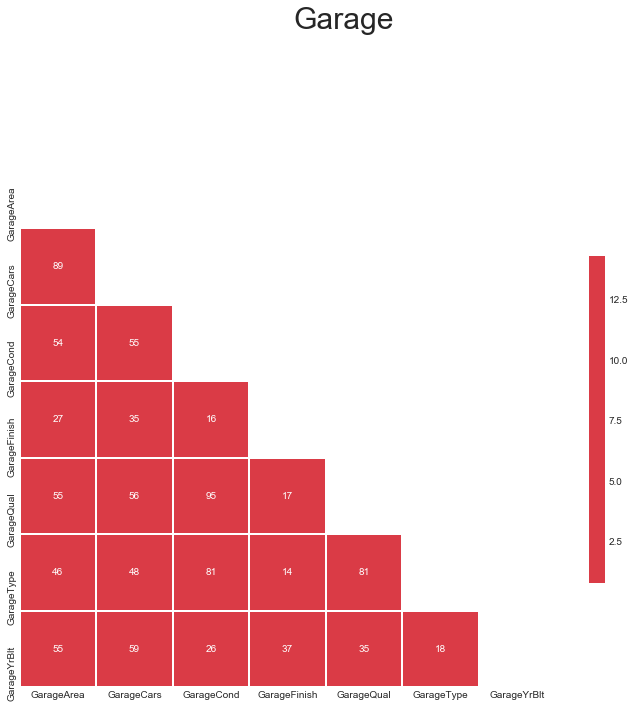

In [48]:
# Heatmap of Garage Features
column_correlation("Garage")

#### III. Drop Redundant Columns

In [49]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2920, 79)


In [50]:
# Create a for loop to drop redundant columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["GarageCond","GarageCars"])

In [51]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2920, 77)


#### IV. Handle Missing Values

In [52]:
# Locate Nulls For GarageArea
loc_missing(df,"GarageArea")

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtQual,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,Functional,GarageArea,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PID,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold,Bath
1712,942,886,0,NaN,3,1Fam,TA,No,Gd,311.0,548.0,0.0,ALQ,Unf,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,Typ,NaN,0,0,5,NaN,1828,GasA,Ex,2Story,2237,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,910201180,Y,0,NaN,CompShg,Gable,Alloca,WD,150909.0,0,Pave,6,859.0,AllPub,174,1923,1999,2007,2.0


In [53]:
# Print percentage of missing nulls in GarageArea
percent_missing(df,"GarageArea")

0.034

In [54]:
# For df: Since nulls are a small percentage of overall data then I will drop these values
df = drop_rows(df,"GarageArea")

# For train: Since nulls are a small percentage of overall data then I will drop these values
train = drop_rows(train,"GarageArea")

# For test: Since nulls are a small percentage of overall data then I will drop these values
test = drop_rows(test,"GarageArea")

In [55]:
# Print new shape of Data Frame
shape_of_dataframe(df)

New shape of DataFrame: (2919, 77)


In [56]:
# Locate Nulls For GarageYrBlt
loc_missing(df,"GarageYrBlt").head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtQual,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,Functional,GarageArea,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PID,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold,Bath
28,1034,957,0,NaN,4,2fmCon,TA,No,TA,957.0,0.0,0.0,Unf,Unf,N,Feedr,Norm,SBrkr,133,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,Typ,0.0,0,0,0,NaN,1991,GasA,Fa,2Story,2243,2,TA,Lvl,Gtl,8250,Inside,75.0,Reg,0,190,C (all),0.0,None,NaN,0,6,IDOTRR,0,6,5,911103060,N,0,NaN,CompShg,Gable,Normal,WD,119600.0,0,Pave,9,957.0,AllPub,0,1895,2006,2007,2.0
53,546,546,0,NaN,3,Twnhs,TA,No,TA,370.0,176.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,Typ,0.0,0,0,0,NaN,1092,GasA,Ex,2Story,330,1,TA,Lvl,Gtl,1476,Inside,21.0,Reg,0,160,RM,0.0,None,NaN,0,3,MeadowV,26,7,4,923226250,Y,0,NaN,CompShg,Gable,Normal,WD,76000.0,0,Pave,5,546.0,AllPub,200,1970,1970,2010,1.5


In [57]:
# Print percentage of missing nulls in GarageYrBlt
percent_missing(df,"GarageYrBlt")

5.31

In [58]:
# Create a for loop to fill in columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _.GarageYrBlt.fillna(_.YearBuilt,inplace = True)

#### V. Check Outliers

In [59]:
# Create a list to boxplot
garage_list = column_filter('Garage').columns.tolist()

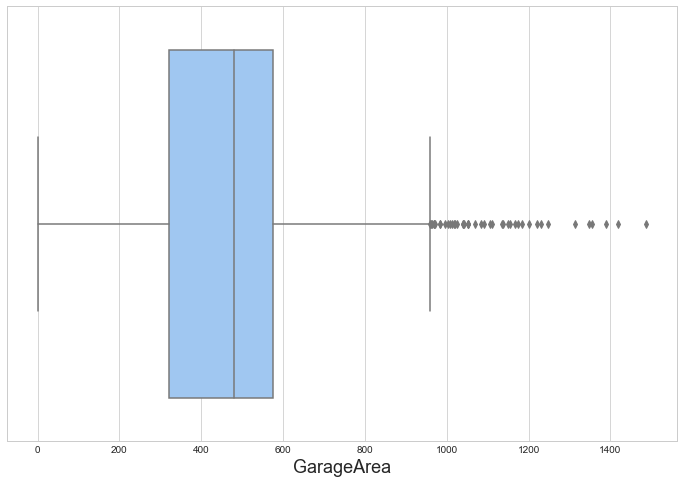

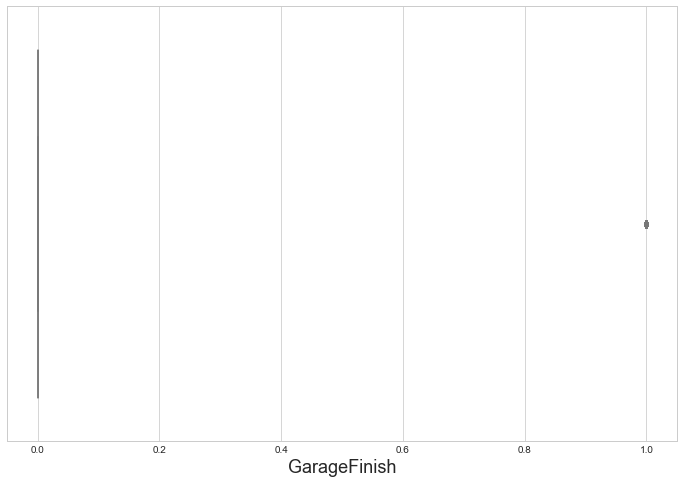

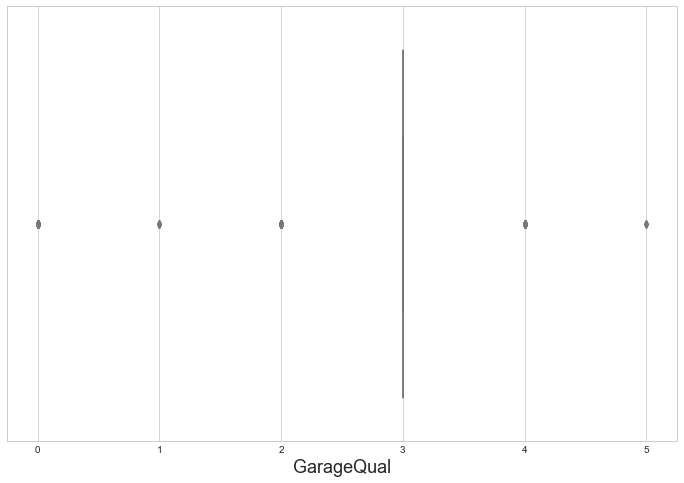

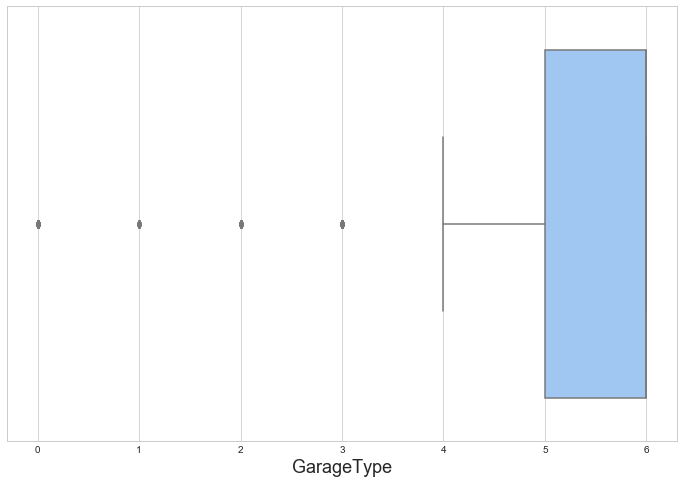

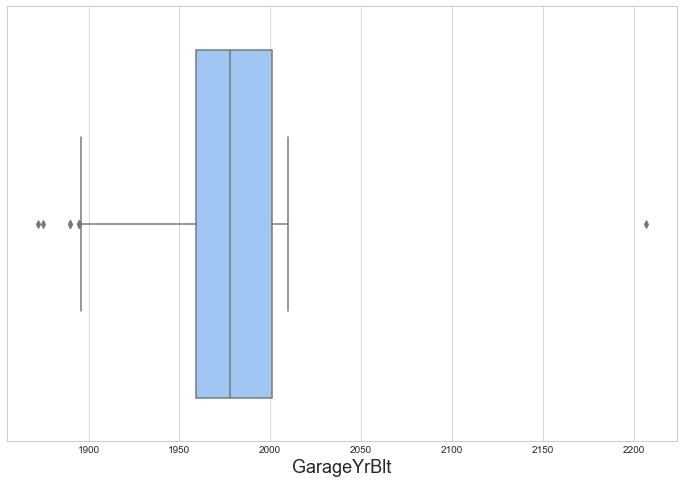

In [60]:
# Create a for loop to plot
for a in garage_list:
    box_plots(df,a)

In [61]:
# Print new shape of Data Frame
shape_of_dataframe(df)

New shape of DataFrame: (2919, 77)


In [62]:
# For df: Since it is a small percentage I will drop GarageArea >1200
df = df.loc[(df["GarageArea"]<1200),:]

# For train: Since it is a small percentage I will drop GarageArea >1200
train = train.loc[(train["GarageArea"]<1200),:]

# For test: Since it is a small percentage I will drop GarageArea >1200
test = test.loc[(test["GarageArea"]<1200),:]
    

In [63]:
# Print new shape of Data Frame
shape_of_dataframe(df)

New shape of DataFrame: (2909, 77)


In [64]:
# For df: Since it is a small percentage I will drop GarageYrBlt >2020
df = df.loc[(df["GarageYrBlt"]<2020),:]

# For train: Since it is a small percentage I will drop GarageYrBlt >2020
train = train.loc[(train["GarageYrBlt"]<2020),:]

# For test: Since it is a small percentage I will drop GarageYrBlt >2020
test = test.loc[(test["GarageYrBlt"]<2020),:]

In [65]:
# Print new shape of Data Frame
shape_of_dataframe(df)

New shape of DataFrame: (2908, 77)


### C. Basement

#### I. Inspect 

In [66]:
# Print Basement info
column_inspection("Bsmt")

Display part of DataFrame:

  BsmtCond BsmtExposure BsmtQual  BsmtUnfSF  BsmtFinSF1  BsmtFinSF2  \
0       TA           No       TA      192.0       533.0         0.0   
1       TA           No       Gd      276.0       637.0         0.0   

  BsmtFinType1 BsmtFinType2  TotalBsmtSF  
0          GLQ          Unf        725.0  
1          GLQ          Unf        913.0  
Description:

         BsmtUnfSF   BsmtFinSF1   BsmtFinSF2  TotalBsmtSF
count  2908.000000  2908.000000  2908.000000  2908.000000
mean    559.805021   438.913343    49.848006  1048.566369
std     439.100857   443.534539   169.326498   429.843755
min       0.000000     0.000000     0.000000     0.000000
25%     219.750000     0.000000     0.000000   791.750000
50%     467.000000   368.500000     0.000000   988.000000
75%     802.250000   732.250000     0.000000  1300.000000
max    2336.000000  4010.000000  1526.000000  5095.000000
Data Types:

BsmtCond         object
BsmtExposure     object
BsmtQual         object
BsmtUnfS

##### Ia. Dealing with Categoricals 

In [67]:
# Select all categoricals from Basement to change to numericals
column_filter("Bsmt").select_dtypes(include=['object']).nunique()

BsmtCond        5
BsmtExposure    4
BsmtQual        5
BsmtFinType1    6
BsmtFinType2    6
dtype: int64

In [68]:
# View all unique 
print("BsmtCond:")
view_unique_cat("BsmtCond")
print("BsmtQual")
view_unique_cat("BsmtQual")
print("BsmtExposure")
view_unique_cat("BsmtExposure")
print("BsmtFinType1")
view_unique_cat("BsmtFinType1")
print("BsmtFinType2")
view_unique_cat("BsmtFinType2")

BsmtCond:
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
BsmtQual
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
BsmtExposure
['No' 'Gd' 'Av' nan 'Mn']
BsmtFinType1
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
BsmtFinType2
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']


In [69]:
# Create a for loop to fill nulls for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    fill_nulls(_,"BsmtCond")
    fill_nulls(_,"BsmtQual")
    fill_nulls(_,"BsmtExposure")
    fill_nulls(_,"BsmtFinType1")
    fill_nulls(_,"BsmtFinType2")

In [70]:
# Create a for loop to map condition dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"BsmtCond",condition_dict)
    map_dictionary(_,"BsmtQual",condition_dict)

In [71]:
# Create a for loop to map exposure dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"BsmtExposure",exposure_dict)

In [72]:
# Create a for loop to map fintype dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"BsmtFinType1",fintype_dict)
    map_dictionary(_,"BsmtFinType2",fintype_dict)

#### II. Correlations

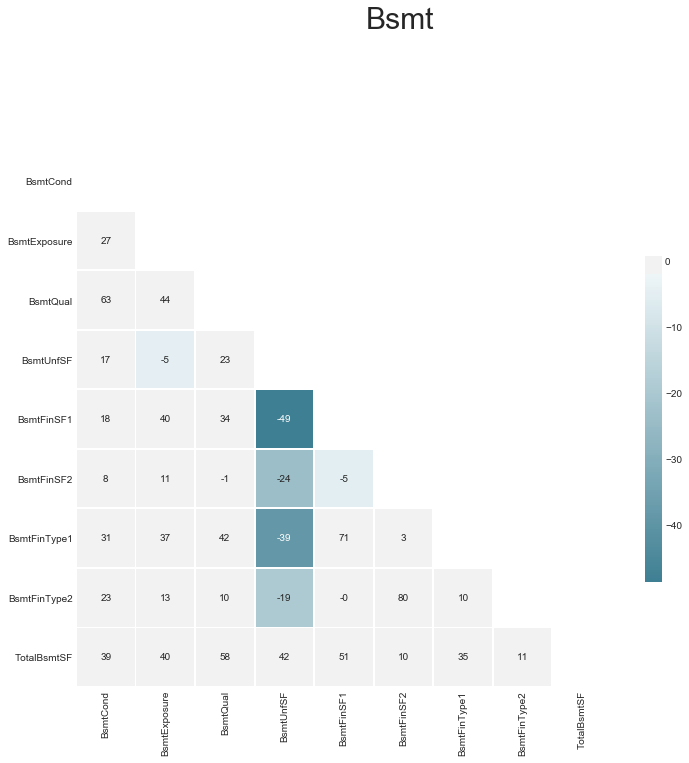

In [73]:
# Heatmap of Basement Features
column_correlation("Bsmt")

#### III. Drop Redundant Columns

In [74]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2908, 77)


In [75]:
# For df: Drop corresponding columns 
drop_redundants(df,["BsmtCond","BsmtFinType1","BsmtFinType2"])

# For train: Drop corresponding columns 
drop_redundants(train,["BsmtCond","BsmtFinType1","BsmtFinType2"])

# For test: Drop corresponding columns
drop_redundants(test,["BsmtCond","BsmtFinType1","BsmtFinType2"])

In [76]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2908, 74)


### D. Lot

#### I. Inspect 

In [77]:
# Print Lot info
column_inspection("Lot")

Display part of DataFrame:

   LotArea LotConfig  LotFrontage LotShape
0    13517   CulDSac          NaN      IR1
1    11492   CulDSac         43.0      IR1
Description:

             LotArea  LotFrontage
count    2908.000000  2423.000000
mean    10103.001376    69.025175
std      7799.763395    22.802707
min      1300.000000    21.000000
25%      7423.000000    58.000000
50%      9422.000000    68.000000
75%     11503.000000    80.000000
max    215245.000000   313.000000
Data Types:

LotArea          int64
LotConfig       object
LotFrontage    float64
LotShape        object
dtype: object
Number of Null Values:

LotArea          0
LotConfig        0
LotFrontage    485
LotShape         0
dtype: int64


##### Ia. Dealing with Categoricals 

In [78]:
# Select all categoricals from Lot to change to numericals
column_filter("Lot").select_dtypes(include=['object']).nunique()

LotConfig    5
LotShape     4
dtype: int64

In [79]:
# View all unique 
print("LotConfig:")
view_unique_cat("LotConfig")
print("LotShape")
view_unique_cat("LotShape")

LotConfig:
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
LotShape
['IR1' 'Reg' 'IR2' 'IR3']


In [80]:
# For df: 
df = pd.get_dummies(df,columns=["LotConfig","LotShape"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["LotConfig","LotShape"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["LotConfig","LotShape"],drop_first=False)

#### II. Correlations

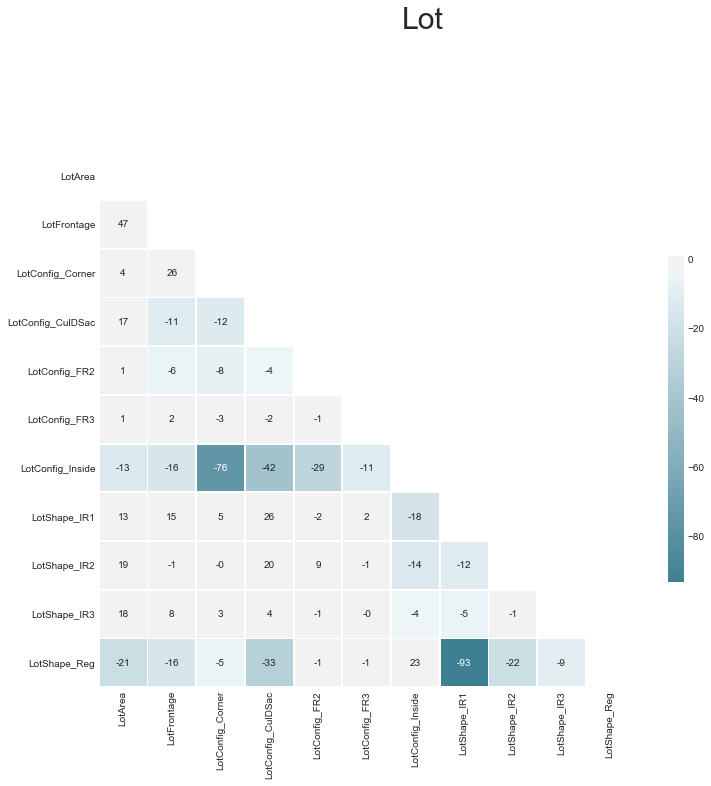

In [81]:
# Heatmap of Lot Features
column_correlation("Lot")

#### V. Handle Missing Values

In [82]:
# Locate Nulls For LotFrontage
loc_missing(df,"LotFrontage").head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtExposure,BsmtQual,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,Functional,GarageArea,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PID,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold,Bath,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,725,754,0,NaN,3,1Fam,1,3,192.0,533.0,0.0,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,Typ,475.0,0,3,6,1976.0,1479,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,NaN,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,Normal,WD,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010,2.5,0,1,0,0,0,1,0,0,0
7,1188,0,0,NaN,3,1Fam,1,3,188.0,1000.0,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,NaN,0,CBlock,Typ,531.0,0,3,6,1959.0,1188,GasA,Fa,1Story,145,1,TA,Lvl,Gtl,12160,NaN,0,20,RL,180.0,BrkFace,NaN,0,5,NAmes,0,5,5,535154050,Y,0,NaN,CompShg,Hip,Abnorml,COD,142000.0,0,Pave,6,1188.0,AllPub,0,1959,1959,2010,2.0,0,0,0,0,1,1,0,0,0


In [83]:
# Print percentage of missing nulls in LotFrontage
percent_missing(df,"LotFrontage")

16.678

In [84]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2908, 81)


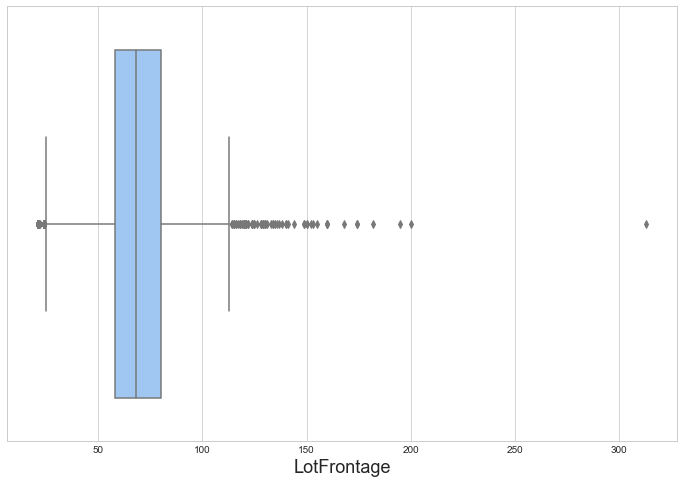

In [85]:
box_plots(df,"LotFrontage")

In [86]:
# Create a for loop to fill in columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _.LotFrontage.fillna(70,axis=0,inplace = True)

In [87]:
# For df: Drop anything greater than 150
df = df.loc[(df["LotFrontage"]<150),:]

# For train: Drop anything greater than 150
train = train.loc[(train["LotFrontage"]<150),:]

# For test: Drop anything greater than 150
test = test.loc[(test["LotFrontage"]<150),:]
    

In [88]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2893, 81)


#### VI. Check Outliers

In [89]:
# Create a list to boxplot
lot_list = column_filter('Lot').columns.tolist()

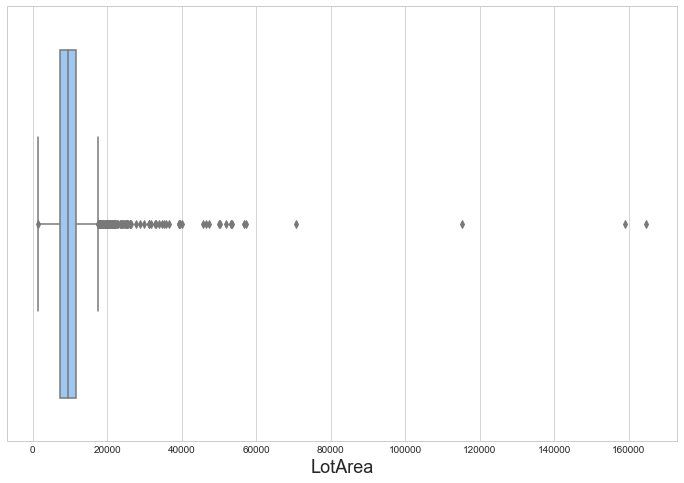

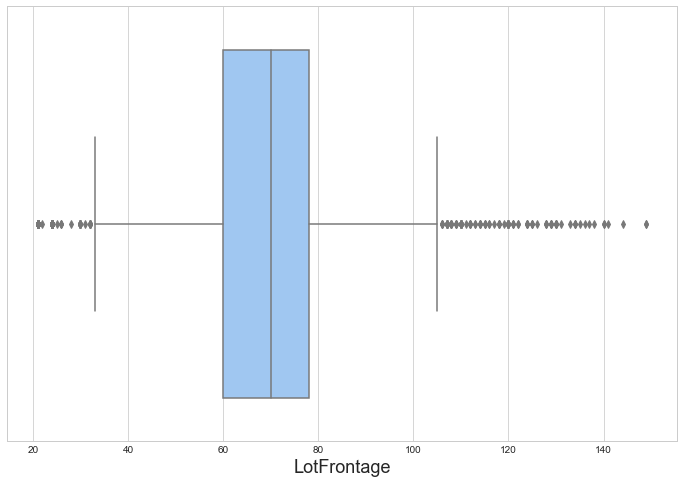

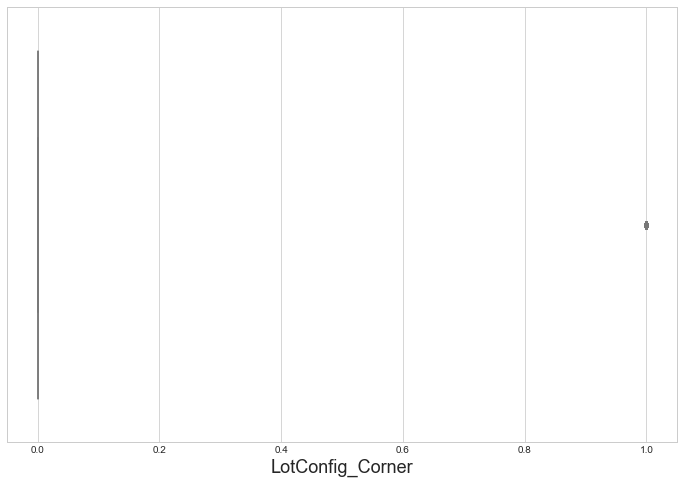

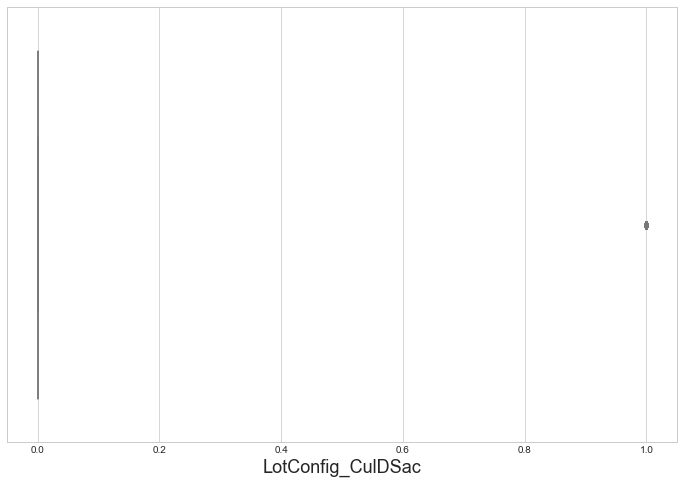

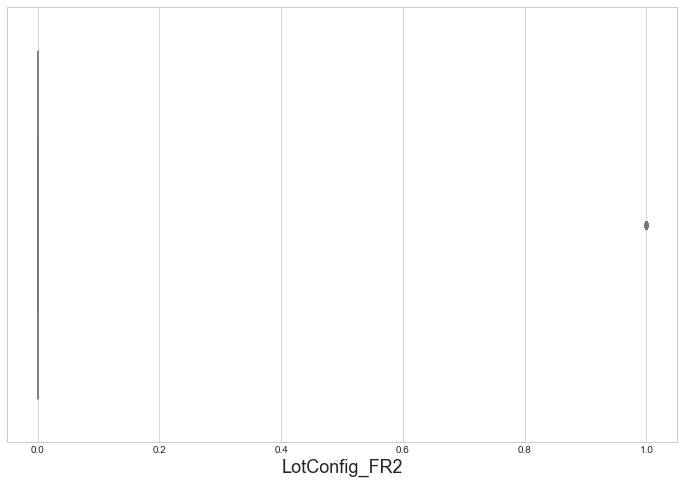

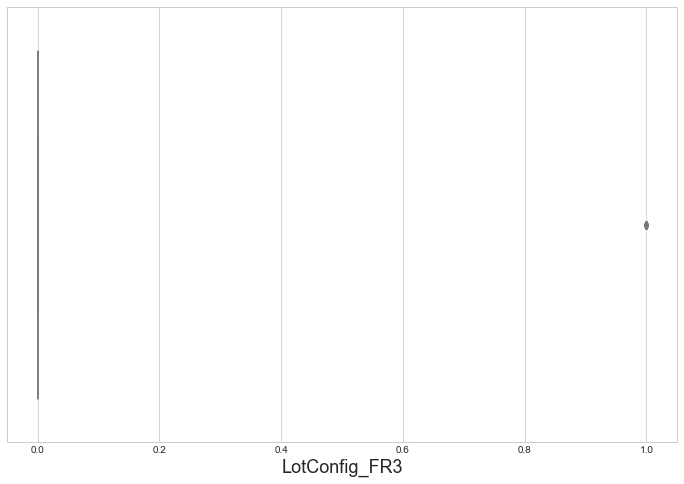

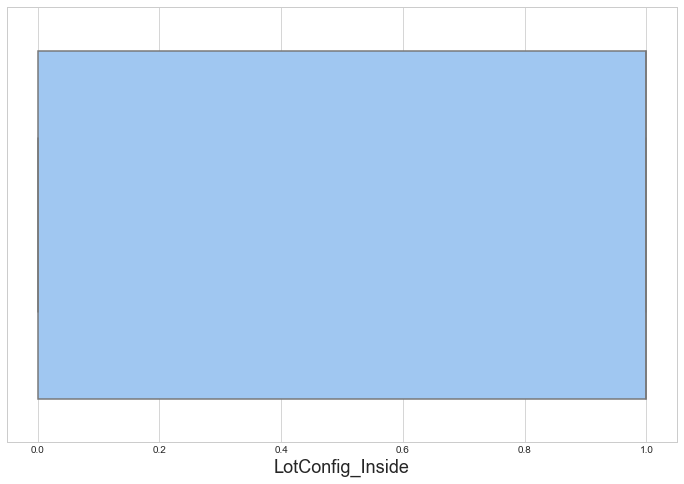

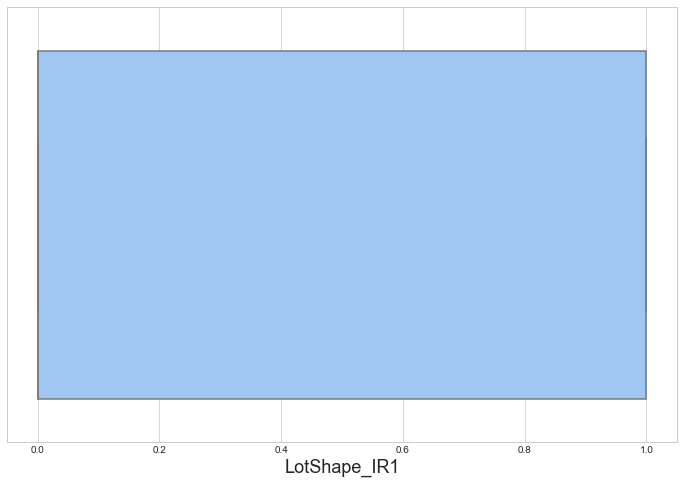

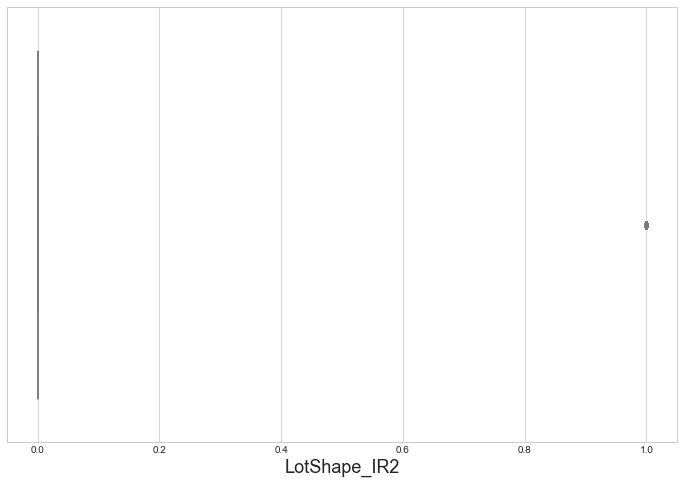

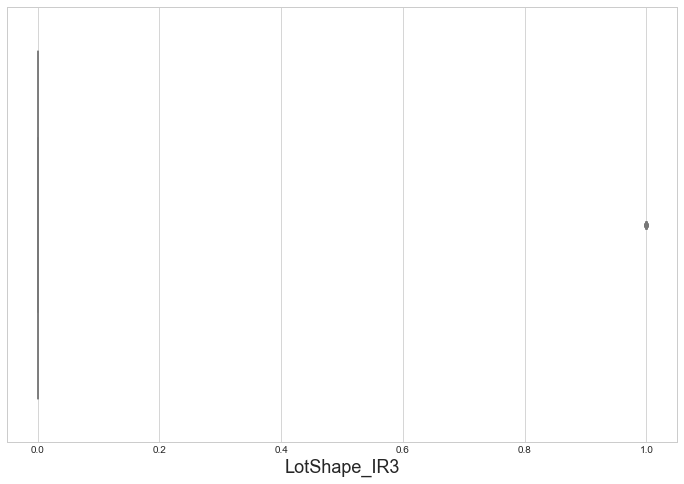

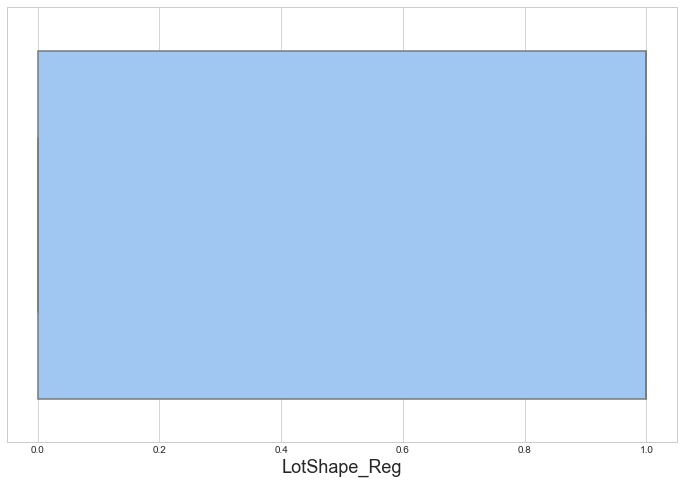

In [90]:
# Create a for loop to plot
for a in lot_list:
    box_plots(df,a)

In [91]:
# For df: Drop anything greater than 50000 for LotArea
df = df.loc[(df["LotArea"]<50000),:]

# For train: Drop anything greater than 50000 for LotArea
train = train.loc[(train["LotArea"]<50000),:]

# For test: Drop anything greater than 50000 for LotArea
test = test.loc[(test["LotArea"]<50000),:]
    

### E. Kitchen

#### I. Inspect

In [92]:
# Filter Kitchen
column_inspection("Kitchen")

Display part of DataFrame:

   KitchenAbvGr KitchenQual
0             1          Gd
1             1          Gd
Description:

       KitchenAbvGr
count   2881.000000
mean       1.043041
std        0.211364
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Data Types:

KitchenAbvGr     int64
KitchenQual     object
dtype: object
Number of Null Values:

KitchenAbvGr    0
KitchenQual     0
dtype: int64


##### Ia. Dealing with Categoricals 

In [93]:
# Select all categoricals from Kitchen to change to numericals
column_filter("Kitchen").select_dtypes(include=['object']).nunique()

KitchenQual    5
dtype: int64

In [94]:
# View all unique 
print("KitchenQual:")
view_unique_cat("KitchenQual")

KitchenQual:
['Gd' 'TA' 'Fa' 'Ex' 'Po']


In [95]:
# Create a for loop to map condition dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"KitchenQual",condition_dict)

#### II. Correlations

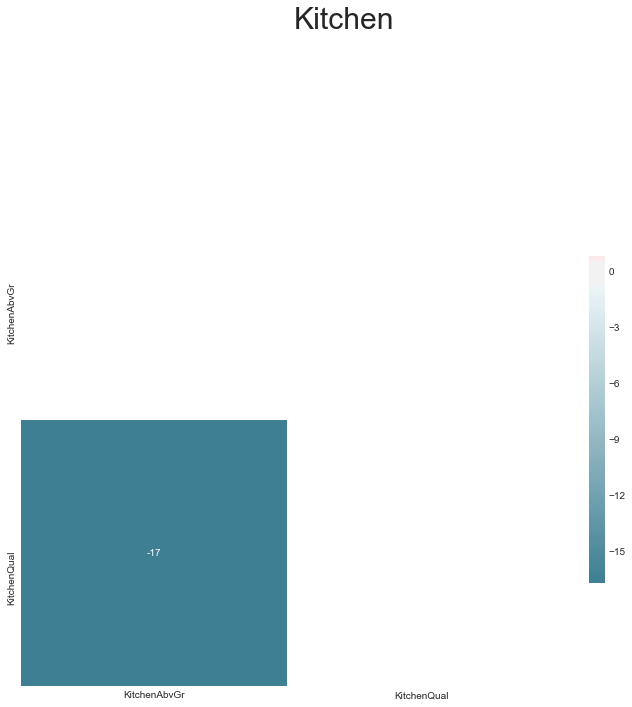

In [96]:
# Heatmap of Kitchen Features
column_correlation("Kitchen")

### F. Pool

#### I. Inspect

In [97]:
# Column inspection for Pool
column_inspection("Pool")

Display part of DataFrame:

   PoolArea PoolQC
0         0    NaN
1         0    NaN
Description:

          PoolArea
count  2881.000000
mean      1.549809
std      30.069625
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max     800.000000
Data Types:

PoolArea     int64
PoolQC      object
dtype: object
Number of Null Values:

PoolArea       0
PoolQC      2872
dtype: int64


#### II. Handle Missing Values

In [98]:
# Locate Nulls For PoolQC
loc_missing(df,"PoolQC").head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtExposure,BsmtQual,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,Functional,GarageArea,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PID,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold,Bath,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,725,754,0,NaN,3,1Fam,1,3,192.0,533.0,0.0,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,Typ,475.0,0,3,6,1976.0,1479,GasA,Ex,2Story,109,1,4,Lvl,Gtl,13517,70.0,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,Normal,WD,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010,2.5,0,1,0,0,0,1,0,0,0
1,913,1209,0,NaN,4,1Fam,1,4,276.0,637.0,0.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,Typ,559.0,0,3,6,1997.0,2122,GasA,Ex,2Story,544,1,4,Lvl,Gtl,11492,43.0,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,Normal,WD,220000.0,0,Pave,8,913.0,AllPub,0,1996,1997,2009,3.5,0,1,0,0,0,1,0,0,0


In [99]:
# Print percentage of missing nulls in PoolQC
percent_missing(df,"PoolQC")

99.688

In [100]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2881, 81)


In [101]:
# Create a for loop to drop PoolQC for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["PoolQC"])

In [102]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2881, 80)


### G. Fireplace

#### I. Inspection

In [103]:
# Filter Fireplace
column_inspection("Fireplace")

Display part of DataFrame:

  FireplaceQu  Fireplaces
0         NaN           0
1          TA           1
Description:

        Fireplaces
count  2881.000000
mean      0.590420
std       0.639742
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       4.000000
Data Types:

FireplaceQu    object
Fireplaces      int64
dtype: object
Number of Null Values:

FireplaceQu    1407
Fireplaces        0
dtype: int64


#### II. Handle Missing Values

In [104]:
# Locate Nulls For PoolQC
loc_missing(df,"FireplaceQu").head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtExposure,BsmtQual,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,Functional,GarageArea,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PID,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold,Bath,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,725,754,0,NaN,3,1Fam,1,3,192.0,533.0,0.0,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,Typ,475.0,0,3,6,1976.0,1479,GasA,Ex,2Story,109,1,4,Lvl,Gtl,13517,70.0,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,CompShg,Gable,Normal,WD,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010,2.5,0,1,0,0,0,1,0,0,0
2,1057,0,0,NaN,3,1Fam,1,3,326.0,731.0,0.0,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,Typ,246.0,0,3,5,1953.0,1057,GasA,TA,1Story,153,1,4,Lvl,Gtl,7922,68.0,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,CompShg,Gable,Abnorml,WD,109000.0,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,2.0,0,0,0,0,1,0,0,0,1


In [105]:
# Print percentage of missing nulls in FireplaceQu
percent_missing(df,"FireplaceQu")

48.837

In [106]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2881, 80)


In [107]:
# Create a for loop to drop FireplaceQu for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["FireplaceQu"])

### H. Porch

#### I. Inspect

In [108]:
# Filter Porch
column_inspection("Porch")

Display part of DataFrame:

   3SsnPorch  EnclosedPorch  OpenPorchSF  ScreenPorch
0          0              0           44            0
1          0              0           74            0
Description:

         3SsnPorch  EnclosedPorch  OpenPorchSF  ScreenPorch
count  2881.000000    2881.000000  2881.000000  2881.000000
mean      2.636585      22.763277    47.329052    15.767442
std      25.352011      63.303070    67.098311    55.650678
min       0.000000       0.000000     0.000000     0.000000
25%       0.000000       0.000000     0.000000     0.000000
50%       0.000000       0.000000    27.000000     0.000000
75%       0.000000       0.000000    70.000000     0.000000
max     508.000000    1012.000000   742.000000   576.000000
Data Types:

3SsnPorch        int64
EnclosedPorch    int64
OpenPorchSF      int64
ScreenPorch      int64
dtype: object
Number of Null Values:

3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
ScreenPorch      0
dtype: int64


#### II. Feature Engineering

In [109]:
# Create a for loop to create a new column for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _["PorchSF"] = _["3SsnPorch"] + _["EnclosedPorch"] +\
             _["OpenPorchSF"] + _["ScreenPorch"] # New Column

#### III. Drop Redundant Columns

In [110]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2881, 80)


In [111]:
# Create a for loop to drop redundant columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["3SsnPorch","EnclosedPorch","OpenPorchSF","ScreenPorch"])

In [112]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2881, 76)


#### VI. Check Outliers

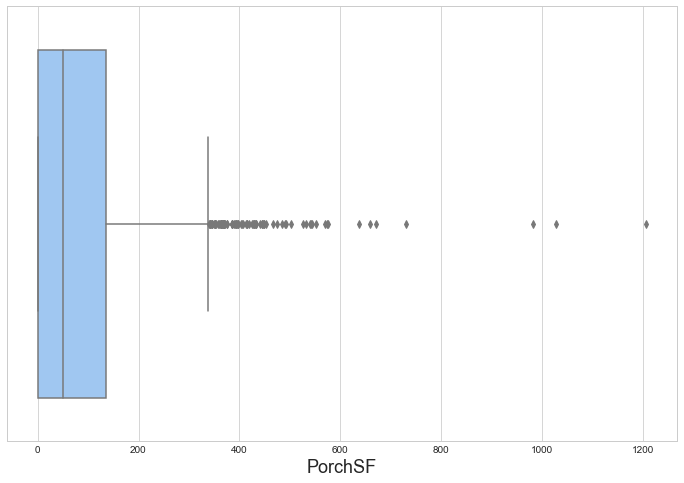

In [113]:
# Box plot for Porch
box_plots(df,"PorchSF")

In [114]:
# For df: Drop anything greater than 600 for PorchSF
df = df.loc[(df["PorchSF"]<600),:]

# For train: Drop anything greater than 600 for PorchSF
train = train.loc[(train["PorchSF"]<600),:]

# For test: Drop anything greater than 600 for PorchSF
test = test.loc[(test["PorchSF"]<600),:]

In [115]:
# Print the shape of the dataframe
shape_of_dataframe(df)

New shape of DataFrame: (2874, 76)


### I. Land

#### I. Inspect

In [116]:
# Filter Land
column_inspection("Land")

Display part of DataFrame:

  LandContour LandSlope
0         Lvl       Gtl
1         Lvl       Gtl
Description:

       LandContour LandSlope
count         2874      2874
unique           4         3
top            Lvl       Gtl
freq          2598      2748
Data Types:

LandContour    object
LandSlope      object
dtype: object
Number of Null Values:

LandContour    0
LandSlope      0
dtype: int64


##### Ia. Dealing with Categoricals 

In [117]:
# Select all categoricals from Lot to change to numericals
column_filter("Land").select_dtypes(include=['object']).nunique()

LandContour    4
LandSlope      3
dtype: int64

In [118]:
# View all unique 
print("LandContour:")
view_unique_cat("LandContour")
print("LandSlope:")
view_unique_cat("LandSlope")

LandContour:
['Lvl' 'HLS' 'Bnk' 'Low']
LandSlope:
['Gtl' 'Sev' 'Mod']


In [119]:
# For df: 
df = pd.get_dummies(df,columns=["LandContour","LandSlope"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["LandContour","LandSlope"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["LandContour","LandSlope"],drop_first=False)

#### II. Correlations

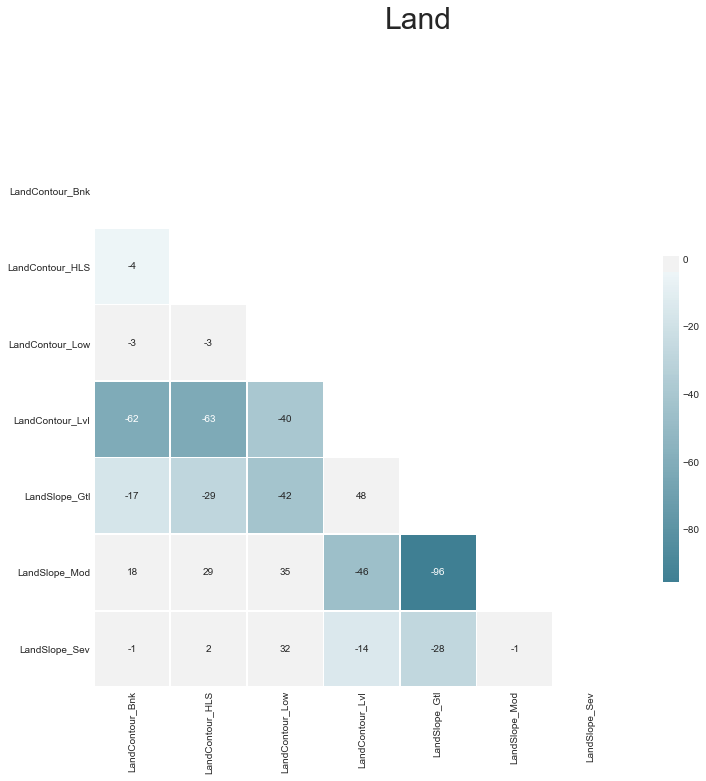

In [120]:
# Heatmap of Land Features
column_correlation("Land")

### J. Heating

#### I. Inspect

In [121]:
# Filter Heating
column_inspection("Heating")

Display part of DataFrame:

  Heating HeatingQC
0    GasA        Ex
1    GasA        Ex
Description:

       Heating HeatingQC
count     2874      2874
unique       6         5
top       GasA        Ex
freq      2834      1464
Data Types:

Heating      object
HeatingQC    object
dtype: object
Number of Null Values:

Heating      0
HeatingQC    0
dtype: int64


##### Ia. Dealing with Categoricals 

In [122]:
# Select all categoricals from Heating to change to numericals
column_filter("Heating").select_dtypes(include=['object']).nunique()

Heating      6
HeatingQC    5
dtype: int64

In [123]:
# View all unique 
print("Heating:")
view_unique_cat("Heating")
print("HeatingQC:")
view_unique_cat("HeatingQC")

Heating:
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
HeatingQC:
['Ex' 'TA' 'Gd' 'Fa' 'Po']


In [124]:
# Create a for loop to map condition dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"HeatingQC",condition_dict)

In [125]:
# For df: 
df = pd.get_dummies(df,columns=["Heating"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["Heating"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["Heating"],drop_first=False)

#### II. Correlations

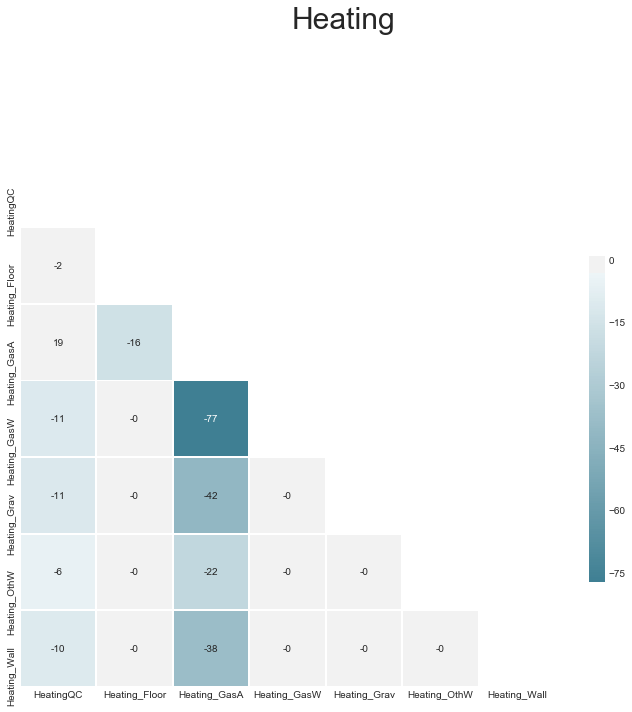

In [126]:
# Heatmap of Heating Features
column_correlation("Heating")

### K. Roof

#### I. Inspect

In [127]:
# Filter Roof
column_inspection("Roof")

Display part of DataFrame:

  RoofMatl RoofStyle
0  CompShg     Gable
1  CompShg     Gable
Description:

       RoofMatl RoofStyle
count      2874      2874
unique        7         6
top     CompShg     Gable
freq       2840      2286
Data Types:

RoofMatl     object
RoofStyle    object
dtype: object
Number of Null Values:

RoofMatl     0
RoofStyle    0
dtype: int64


##### Ia. Dealing with Categoricals 

In [128]:
# Select all categoricals from Roof to change to numericals
column_filter("Roof").select_dtypes(include=['object']).nunique()

RoofMatl     7
RoofStyle    6
dtype: int64

In [129]:
# View all unique 
print("RoofMatl:")
view_unique_cat("RoofMatl")
print("RoofStyle:")
view_unique_cat("RoofStyle")

RoofMatl:
['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'Metal' 'Roll']
RoofStyle:
['Gable' 'Hip' 'Flat' 'Mansard' 'Gambrel' 'Shed']


In [130]:
# Create a for loop to create a new column for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _["RoofMatl"] = _["RoofMatl"].apply(lambda x: 1 if x == "CompShg" else 0)

In [131]:
# For df: 
df = pd.get_dummies(df,columns=["RoofStyle"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["RoofStyle"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["RoofStyle"],drop_first=False)

### L. Quality

#### I. Inspect

In [132]:
# Filter columns that contain Qual,QC,QU,Cond
quality_filter = df[df.columns[(df.columns.to_series().str.contains('Qual'))\
                                | (df.columns.to_series().str.contains('QC'))\
                                | (df.columns.to_series().str.contains('Qu'))\
                                | (df.columns.to_series().str.contains('Cond'))]]
# Prints a dataframe with columns containing qualities
quality_filter.head(2)

,BsmtQual,Condition1,Condition2,ExterCond,ExterQual,GarageQual,HeatingQC,KitchenQual,LowQualFinSF,OverallCond,OverallQual,SaleCondition
0,3,RRAe,Norm,TA,Gd,3,5,4,0,8,6,Normal
1,4,Norm,Norm,TA,Gd,3,5,4,0,5,7,Normal


##### Ia. Dealing with Categoricals 

In [133]:
# Select all categoricals from Roof to change to numericals
column_filter("Qual").select_dtypes(include=['object']).nunique()

ExterQual    4
dtype: int64

In [134]:
# View all unique 
print("ExterQual:")
view_unique_cat("ExterQual")

ExterQual:
['Gd' 'TA' 'Ex' 'Fa']


In [135]:
# Create a for loop to map condition dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"ExterQual",condition_dict)

In [136]:
# Select all categoricals from Roof to change to numericals
column_filter("Cond").select_dtypes(include=['object']).nunique()

Condition1       9
Condition2       8
ExterCond        5
SaleCondition    6
dtype: int64

In [137]:
# View all unique 
print("ExterCond:")
view_unique_cat("ExterCond")
print("Condition1:")
view_unique_cat("Condition1")
print("Condition2:")
view_unique_cat("Condition2")
print("SaleCondition:")
view_unique_cat("SaleCondition")

ExterCond:
['TA' 'Gd' 'Fa' 'Ex' 'Po']
Condition1:
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
Condition2:
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
SaleCondition:
['Normal' 'Abnorml' 'Partial' 'Family' 'Alloca' 'AdjLand' nan]


In [138]:
# Create a for loop to map condition dictionary for each given data frame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    map_dictionary(_,"ExterCond",condition_dict)

In [139]:
# Create a for loop to drop Condition2 for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["Condition2"])

In [140]:
# For df: 
df = pd.get_dummies(df,columns=["Condition1"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["Condition1"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["Condition1"],drop_first=False)

In [141]:
# Print percentage of missing nulls in Bath
percent_missing(df,"SaleCondition")

29.923

In [142]:
# For df: 
df = pd.get_dummies(df,columns=["SaleCondition"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["SaleCondition"],drop_first=False)

### M. MS

#### I. Inspect

In [143]:
# Filter columns that contain MS,Mas
mas_filter = df[df.columns[(df.columns.to_series().str.contains('MS'))\
                                |(df.columns.to_series().str.contains('Mas'))]]
# Prints a dataframe with columns containing MS,Mas
mas_filter.head(2)

,MSSubClass,MSZoning,MasVnrArea,MasVnrType
0,60,RL,289.0,BrkFace
1,60,RL,132.0,BrkFace


In [144]:
view_unique_cat("MSZoning")

['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']


In [145]:
# For df: 
df = pd.get_dummies(df,columns=["MSZoning"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["MSZoning"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["MSZoning"],drop_first=False)

#### II. Fill Missing Values

In [146]:
# Create a for loop to fill in columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _.MasVnrArea.fillna(0,axis=0,inplace = True)

In [147]:
# Create a for loop to fill in columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _.MasVnrType.fillna('Na',axis=0,inplace = True)

In [148]:
# For df: 
df = pd.get_dummies(df,columns=["MasVnrType"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["MasVnrType"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["MasVnrType"],drop_first=False)

### O. Exterior

#### I. Inspect

In [149]:
# Filter columns that contain Exterior,Exter
exterior_filter = df[df.columns[(df.columns.to_series().str.contains('Exterior'))\
                                |(df.columns.to_series().str.contains('Exter'))]]
# Prints a dataframe with columns containing exterior
exterior_filter.head(2)

,ExterCond,ExterQual,Exterior1st,Exterior2nd
0,3,4,HdBoard,Plywood
1,3,4,VinylSd,VinylSd


In [150]:
# Create a for loop to drop redundant columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["Exterior2nd"])

In [151]:
# For df: 
df = pd.get_dummies(df,columns=["Exterior1st"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["Exterior1st"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["Exterior1st"],drop_first=False)

## 6. Inspect Remaining 

### A. Missing Values

In [152]:
percent_missing_data(df)

Percentage of missing data:
Alley : 2679 values missing which is 93.215 % of total dataframe.
Electrical : 1 values missing which is 0.035 % of total dataframe.
Fence : 2314 values missing which is 80.515 % of total dataframe.
MiscFeature : 2774 values missing which is 96.521 % of total dataframe.
SalePrice : 860 values missing which is 29.923 % of total dataframe.


In [153]:
# Create a for loop to drop columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    drop_redundants(_,["MiscFeature","Alley","Fence"])

In [154]:
column_inspection("Electrical")

Display part of DataFrame:

  Electrical
0      SBrkr
1      SBrkr
Description:

       Electrical
count        2873
unique          5
top         SBrkr
freq         2630
Data Types:

Electrical    object
dtype: object
Number of Null Values:

Electrical    1
dtype: int64


In [155]:
# Create a for loop to fill in columns for each given DataFrame
frames = [df, train, test] # List of DataFrames
for _ in frames: #Loop through the list
    _.Electrical.fillna('SBrkr',axis=0,inplace = True)

In [156]:
# For df: 
df = pd.get_dummies(df,columns=["Electrical"],drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=["Electrical"],drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=["Electrical"],drop_first=False)

### B. Dummy Variables

In [157]:
# Select all categoricals 
categorical_names = df.select_dtypes(include=['object']).columns.tolist()

In [158]:
categorical_names

['BldgType',
 'CentralAir',
 'Foundation',
 'Functional',
 'HouseStyle',
 'Neighborhood',
 'PavedDrive',
 'SaleType',
 'Street',
 'Utilities']

In [159]:
for _ in categorical_names:
    print("%s"%str(_),":")
    view_unique_cat(_)
    print("_______________________________________________")

BldgType :
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
_______________________________________________
CentralAir :
['Y' 'N']
_______________________________________________
Foundation :
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
_______________________________________________
Functional :
['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
_______________________________________________
HouseStyle :
['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
_______________________________________________
Neighborhood :
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
_______________________________________________
PavedDrive :
['Y' 'N' 'P']
_______________________________________________
SaleType :
['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth

In [160]:
# For df: 
df = pd.get_dummies(df,columns=categorical_names,drop_first=False)
# For train: 
train = pd.get_dummies(train,columns=categorical_names,drop_first=False)
# For test: 
test = pd.get_dummies(test,columns=categorical_names,drop_first=False)

## 7. Save the Cleaned DataFrames

In [161]:
# Save cleaned df
df.to_csv("../Datasets/cleaned_df.csv",index=None)
# Save cleaned train
train.to_csv("../Datasets/cleaned_train.csv",index=None)
# Save cleaned test
test.to_csv("../Datasets/cleaned_test.csv",index=None)